In [1]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.metrics import r2_score as R2S
import cairo

## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2024-02-26


'2024-02-26'

In [12]:
tubulin = '[Tubulin] (' r'$\mu$' 'M)'
tub = 'tub'

DCXconc = '[DCX] (nM)' 
EBconc = '[EB] (nM)'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration (' r'$\mu$' 'M)'
Length = 'Length (' r'$\mu$' 'm)'
Lifetime = 'Lifetime (min)'
GrowthRate = 'Growth Rate (' r'$\mu$' 'm/min)'
TimeToNucleate = 'Time to Nucleate (min)'
ShrinkageLength = 'Shrink Length (' r'$\mu$' 'm)'
ShrinkageLifetime = 'Shrink Lifetime (min)'
ShrinkageRate = 'Shrink Rate (' r'$\mu$' 'm/min)'
RescuePerLength = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' ')'
RescuePerTime = 'Rescues ( s' r'$^{-1}$' ')'
RescuePerLT = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' 's'  r'$^{-1}$' ')'

In [4]:
Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']

category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [5]:
grey00 = '#777777'
grey20 = '#C5C5C5'
cyan00 = '#0089CF'  
cyan20 = '#65CBFF'
pink00 = '#e468b8'
pink20 = '#FBB0E1'
orange00 = '#ff8341'
orange20 = '#FFC6A8'


In [32]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette_all = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
palette_ppr = [grey] + list(map(Color.get_hex,DC1color))[:-1] + list(map(Color.get_hex,DC2color)) + [cyan]

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
palette_ppr

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


['#777777', '#ab4a9c', '#e468b8', '#ff5b00', '#ff8341', '#ffac83', '#0089CF']

In [7]:
### font for matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'

## Open data if already saved ##

In [8]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file


,Date,Investigator,CH,[Tubulin] ($\mu$M),[DCX] (nM),Length ($\mu$m),Lifetime (min),Growth Rate ($\mu$m/min),Time to Nucleate (min),Shrink Length ($\mu$m),Shrink Lifetime (min),Shrink Rate ($\mu$m/min),Rescues,DCX Type
0,2020-07-03,Sofia,13,12,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
1,2020-07-03,Sofia,13,12,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
2,2020-07-03,Sofia,13,12,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
3,2020-07-03,Sofia,13,12,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
4,2020-07-03,Sofia,13,12,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,2021-01-29,Sofia,22,6,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
11304,2021-01-29,Sofia,22,6,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
11305,2021-01-29,Sofia,22,6,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
11306,2021-01-29,Sofia,22,6,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [28]:
data = pd.read_csv(askmastersheet, encoding='utf-8')
data[Type] = data[Type].fillna('None')
data 

,Date,Investigator,CH,[Tubulin] ($\mu$M),[DCX] (nM),Length ($\mu$m),Lifetime (min),Growth Rate ($\mu$m/min),Time to Nucleate (min),Shrink Length ($\mu$m),Shrink Lifetime (min),Shrink Rate ($\mu$m/min),Rescues,DCX Type
0,2020-07-03,Sofia,13,12,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
1,2020-07-03,Sofia,13,12,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
2,2020-07-03,Sofia,13,12,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
3,2020-07-03,Sofia,13,12,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
4,2020-07-03,Sofia,13,12,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,2021-01-29,Sofia,22,6,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
11304,2021-01-29,Sofia,22,6,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
11305,2021-01-29,Sofia,22,6,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
11306,2021-01-29,Sofia,22,6,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [9]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Plots')

In [30]:
data = data.dropna()
data[Type].unique()

array(['None', 'Y64N', 'R76S', 'R102S', 'R178L', 'P191R', 'G223E',
       'R303X', 'WT'], dtype=object)

In [31]:
data = data[data[Type].str.contains("R102S|R303X")==False]
data[Type].unique()

array(['None', 'Y64N', 'R76S', 'R178L', 'P191R', 'G223E', 'WT'],
      dtype=object)

# Rescues #

In [34]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():

                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
                    n = len(selectdata.dropna().index)

                    if n == 0:
                        continue
                        
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]

                    rvn = selectdata['Rescues'].dropna().value_counts(normalize = False).to_frame()
                    rescue_values_n = n-rvn.loc[0][0]

                    length = selectdata[ShrinkageLength].sum()
                    time = selectdata[ShrinkageLifetime].sum()
                    
                    res_p_len = rescue_values_n/length
                    res_p_time = rescue_values_n/time
                    res_p_len_time = rescue_values_n/length/time
                    
                    SDlen = res_p_len * n * 0.107 / length
                    SDtime = res_p_len * n * 5  / time 
                    SDlt = res_p_len * n * np.sqrt(np.square(0.107  / length) + np.square(5  / time))
                    
                

                #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], 'Normalized Rescue': [rescue_values],
                         'Rescue Number': [rescue_values_n],'n': [n],ShrinkageLength: [length],
                          RescuePerLength: [res_p_len] ,'SD len': [SDlen],
                         RescuePerTime: [res_p_time] ,'SD time': [SDtime],
                         RescuePerLT: [res_p_len_time] ,'SD len time': [SDlt],}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

    return results

In [35]:
selectdata = data[(data[tubulin]==6)&(data[Type]=='WT')&(data[DCXconc]==32)]
selectdata[ShrinkageLength].sum()

575.6829036865809

In [36]:
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Plots')

In [38]:
rescues = rescue_count(data.dropna())
rescues.to_csv(newmydir/('Rescues_'+date+'.csv'), encoding='utf-8', index=False)
rescues

C:\Users\sofia\AppData\Local\Temp\ipykernel_7996\1855861789.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
C:\Users\sofia\AppData\Local\Temp\ipykernel_7996\1855861789.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rescue_values = 1-rv.loc[0][0]
C:\Users\sofia\AppData\Local\Temp\ipykernel_7996\1855861789.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rescue_values_n = n-rvn.loc[0]

,[Tubulin] ($\mu$M),DCX Type,[DCX] (nM),Normalized Rescue,Rescue Number,n,Shrink Length ($\mu$m),Rescues ($\mu$m$^{-1}$),SD len,Rescues ( s$^{-1}$),SD time,Rescues ($\mu$m$^{-1}$s$^{-1}$),SD len time
0,12,None,0,0.047619,5,105,972.805151,0.005140,0.000059,0.118632,0.064023,0.000122,0.064023
0,8,None,0,0.034483,1,29,134.927000,0.007411,0.000170,0.135550,0.145670,0.001005,0.145670
0,6,None,0,0.010850,6,553,1210.078602,0.004958,0.000242,0.076886,0.175683,0.000064,0.175683
0,6,Y64N,32,0.000000,0,206,464.981364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,6,Y64N,57,0.034615,9,260,566.093678,0.015898,0.000781,0.063127,0.144966,0.000112,0.144969
0,6,Y64N,79,0.075163,23,306,789.490326,0.029133,0.001208,0.118006,0.228691,0.000149,0.228694
0,6,Y64N,114,0.247826,57,230,574.086040,0.099288,0.004256,0.262601,0.526038,0.000457,0.526055
0,6,Y64N,227,0.868932,179,206,487.237800,0.367377,0.016620,0.803405,1.698364,0.001649,1.698445
0,6,R76S,32,0.004444,1,225,555.903854,0.001799,0.000078,0.026791,0.054218,0.000048,0.054218
0,6,R76S,57,0.006410,2,312,738.677589,0.002708,0.000122,0.020000,0.042237,0.000027,0.042237


## Open rescues ##

In [31]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
rescues = pd.read_csv(askFitParam, encoding='utf-8',keep_default_na=False)
rescues

,[Tubulin] ($\mu$M),DCX Type,[DCX] (nM),Normalized Rescue,Rescue Number,n,Shrink Length ($\mu$m),Rescues ($\mu$m$^{-1}$)
0,12,None,0,0.047619,5,105,972.805151,0.005140
1,8,None,0,0.034483,1,29,134.927000,0.007411
2,6,None,0,0.010850,6,553,1210.078602,0.004958
3,6,Y64N,32,0.000000,0,206,464.981364,0.000000
4,6,Y64N,57,0.034615,9,260,566.093678,0.015898
5,6,Y64N,79,0.075163,23,306,789.490326,0.029133
6,6,Y64N,114,0.247826,57,230,574.086040,0.099288
7,6,Y64N,227,0.868932,179,206,487.237800,0.367377
8,6,R76S,32,0.004444,1,225,555.903854,0.001799
9,6,R76S,57,0.006410,2,312,738.677589,0.002708


In [32]:
resultdirectory = str(Path(askFitParam).parent)+'//Plots_'+date
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/2023-08-08_fitdata-final/Plots_2024-02-23')

## Fit ##

In [39]:
x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'WT')][DCXconc]
y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'WT')][RescuePerLength]
x0 = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'None')][DCXconc]
y0 = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'None')][RescuePerLength]
X = [*x0,*x]
YR = [*y0,*y]

# def hillEQ2(x, n, kd):
#     return np.power(x, n)/(kd + np.power(x, n)) 
# def MMEQ2(x, kd):
#     return np.power(x, 1)/(kd + np.power(x, 1)) 

# coeff, var_matrix = sp.optimize.curve_fit(hillEQ2,X,YR)

# variance = np.diagonal(var_matrix) #Refer [3]
# SE = np.sqrt(variance)

# C1R,C2R = coeff
# coeff,SE

In [40]:
def hillEQ2(x, n, kd):
    return (YR[-1]- YR[0]) * np.power(x, n)/(kd + np.power(x, n)) + YR[0]

In [61]:
coeff, var_matrix = sp.optimize.curve_fit(hillEQ2,X,YR)
C1R,C2R = coeff
coeff

array([3.11315801e+00, 5.77238133e+05])

In [42]:
### X = np.array(X)
R2S(YR,hillEQ2(X,C1R, C2R))

0.9764753285547165

In [43]:
X = np.array(X)
R2S(YR,MMEQ2(X,coeffMMR))

NameError: name 'MMEQ2' is not defined

In [44]:
x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'P191R')][DCXconc]
y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'P191R')][RescuePerLength]

XR191 = np.array(x[1:])
YR191 = np.array(y[1:])


p, cov = np.polyfit(XR191,YR191, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mR191,bR191=p
R2R191 = R2S(YR191,XR191*mR191+bR191)
R2R191

0.9773441700104696

## Plot ##

In [54]:
X = np.array(X)
YR = np.array(YR)
logx = np.log(X[1:-1])
normyR =( YR[1:-1]-YR[0])/(YR[-1]-YR[0])
logyR = np.log(normyR/(1-normyR))

p, cov = np.polyfit(logx, logyR, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

mR,bR = p
p, SElin

(array([  2.54184115, -10.80112988]), array([0.50557431, 2.11317421]))

In [55]:
R2S(logyR,logx*mR+bR)

0.9266783547729761

In [58]:
def K_A(p):
    return np.exp(-p[1]/p[0]) , np.exp(-p[1]/p[0])/p[0]*np.sqrt(np.square(SElin[1])+np.square(p[1]*SElin[0]/p[0]))

In [59]:
K_A(p)

(70.05867871590753, 83.05746506459028)

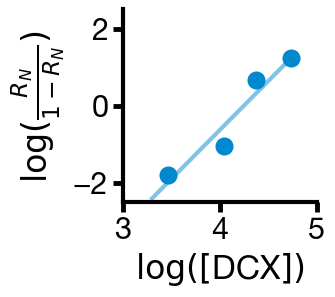

In [57]:
scattersize = 9
cap = 5

fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
ax.errorbar(logx , logyR , yerr= 0 , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,color=cyan, alpha = 1, ls='')

x0 = np.arange(3.3, 4.8, 0.05)
ax.plot(x0, x0*mR+bR,color = cyan, lw=3,ls= '-',alpha = 0.5)

ax.set_ylim(-2.5,2.5)
ax.set_xlim(3,5)
ax.set_xlabel(r'$\log([$''DCX' r'$])$')
#ax.set_xticks(np.arange(0, 22.1, 2))
#ax.set_yticks(np.arange(0, 150.1, 25))
ax.set_ylabel(r'$\log(\frac{R_N}{1-R_N})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.94 \pm 0.49$' '\n' r'$R^2 > 0.945$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(newmydir/('logexpHillfit_Rescues_'+date+'.pdf'), bbox_inches = 'tight')

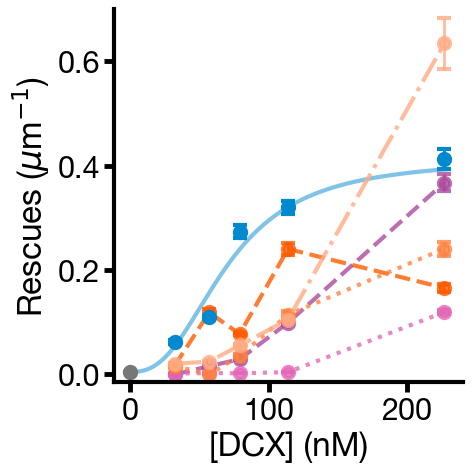

In [66]:
scattersize = 8
cap = 5
linetype = ['','--', ':','--', ':', '-.','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]
palette = palette_ppr

linx = np.arange(0, 230, 1)
ax.plot(linx, hillEQ2(linx,p[0],np.exp(-p[1])),color = cyan, lw=3,ls= '-',alpha = 0.5)
# linx = np.arange(57, 230, 1)
# ax.plot(linx, linx*mR191+bR191, C2R,color = list(map(Color.get_hex,DC2color))[1], lw=3,ls= '-',alpha = 0.5)

for dcxtype in rescues[Type].unique():#['None','WT']: #data[Type].unique(): #['None','R76S','P191R','WT']

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][RescuePerLength]
    
    yerr = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['SD len']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.errorbar(x , y , yerr = yerr , color=palette[count],marker = 'o', ms=scattersize, ls=' ',capsize = cap,
                              markeredgewidth=3,elinewidth=2)
    
    else:
        
        ax.errorbar(x , y , yerr = yerr ,color=palette[count],marker = 'o', ms=scattersize, ls=linetype[count],alpha=0.8,capsize = cap,
                              markeredgewidth=3,elinewidth=2)

    count += 1



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,0.7)
ax.set_yticks(np.arange(0, 0.71, 0.2))
#ax.set_xlim(-10,250)
ax.set_xticks(np.arange(0, 251, 100))
ax.set_xlabel(DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel(RescuePerLength)

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_all-mutants'+date+'.pdf'))

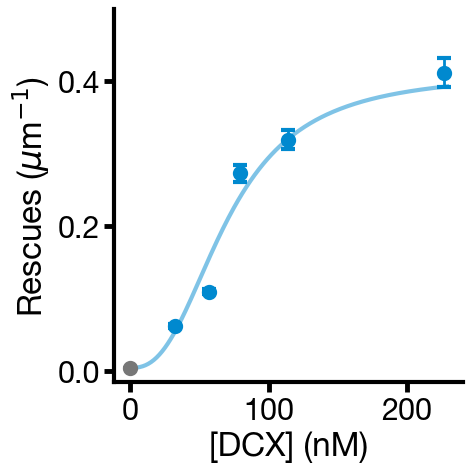

In [68]:
scattersize = 8
cap = 5
linetype = ['','--', ':','--', ':', '-.','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]
palette = [grey,cyan]#palette_ppr

linx = np.arange(0, 230, 1)
ax.plot(linx, hillEQ2(linx,p[0],np.exp(-p[1])),color = cyan, lw=3,ls= '-',alpha = 0.5)
# linx = np.arange(57, 230, 1)
# ax.plot(linx, linx*mR191+bR191, C2R,color = list(map(Color.get_hex,DC2color))[1], lw=3,ls= '-',alpha = 0.5)

for dcxtype in ['None','WT']:#['None','WT']: #data[Type].unique(): #['None','R76S','P191R','WT']

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][RescuePerLength]
    
    yerr = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['SD len']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.errorbar(x , y , yerr = yerr , color=palette[count],marker = 'o', ms=scattersize, ls=' ',capsize = cap,
                              markeredgewidth=3,elinewidth=2)
    
    else:
        
        ax.errorbar(x , y , yerr = yerr ,color=palette[count],marker = 'o', ms=scattersize, ls=linetype[count],alpha=0.8,capsize = cap,
                              markeredgewidth=3,elinewidth=2)

    count += 1



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,0.5)
ax.set_yticks(np.arange(0, 0.51, 0.2))
#ax.set_xlim(-10,250)
ax.set_xticks(np.arange(0, 251, 100))
ax.set_xlabel(DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel(RescuePerLength)

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_WT'+date+'.pdf'))

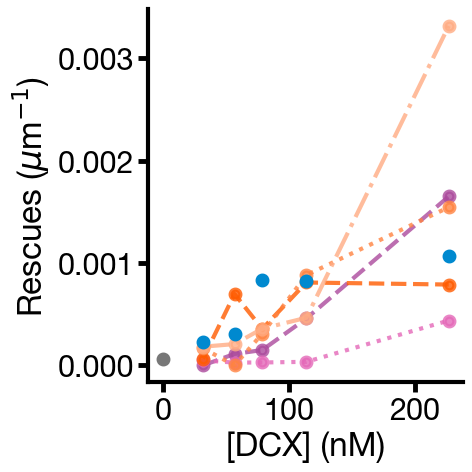

In [73]:
scattersize = 7
cap = 5
linetype = ['','--', ':','--', ':', '-.','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]
palette = palette_ppr

linx = np.arange(0, 230, 1)
#ax.plot(linx, hillEQ2(linx,C1R, C2R),color = cyan, lw=3,ls= '-',alpha = 0.5)
# linx = np.arange(57, 230, 1)
# ax.plot(linx, linx*mR191+bR191, C2R,color = list(map(Color.get_hex,DC2color))[1], lw=3,ls= '-',alpha = 0.5)

for dcxtype in rescues[Type].unique():#['None','WT']: #data[Type].unique(): #['None','R76S','P191R','WT']

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][RescuePerLT]
    
    yerr = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['SD len time']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.errorbar(x , y  , color=palette[count],marker = 'o', ms=scattersize, ls=' ',capsize = cap,
                              markeredgewidth=3,elinewidth=2)
    
    else:
        
        ax.errorbar(x , y  ,color=palette[count],marker = 'o', ms=scattersize, ls=linetype[count],alpha=0.8,capsize = cap,
                              markeredgewidth=3,elinewidth=2)

    count += 1



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
#ax.set_ylim(-0.015,0.7)
#ax.set_yticks(np.arange(0, 0.71, 0.2))
#ax.set_xlim(-10,250)
ax.set_xticks(np.arange(0, 251, 100))
ax.set_xlabel(DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel(RescuePerLength)

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
#plt.savefig(newmydir/('joint_graphsRescues_all-mutants'+date+'.pdf'))